In [1]:
import scanpy as sc
import celltypist
from celltypist import models

In [2]:
models.models_description()

👉 Detailed model information can be found at `https://www.celltypist.org/models`
📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 54


model  \
0                        Immune_All_Low.pkl   
1                       Immune_All_High.pkl   
2                    Adult_COVID19_PBMC.pkl   
3   Adult_CynomolgusMacaque_Hippocampus.pkl   
4                       Adult_Human_MTG.pkl   
5           Adult_Human_PancreaticIslet.pkl   
6          Adult_Human_PrefrontalCortex.pkl   
7                      Adult_Human_Skin.pkl   
8                  Adult_Human_Vascular.pkl   
9                       Adult_Mouse_Gut.pkl   
10            Adult_Mouse_OlfactoryBulb.pkl   
11                Adult_Pig_Hippocampus.pkl   
12      Adult_RhesusMacaque_Hippocampus.pkl   
13                 Autopsy_COVID19_Lung.pkl   
14         COVID19_HumanChallenge_Blood.pkl   
15             COVID19_Immune_Landscape.pkl   
16                   Cells_Adult_Breast.pkl   
17                     Cells_Fetal_Lung.pkl   
18                   Cells_Human_Tonsil.pkl   
19               Cells_Intestinal_Tract.pkl   
20                    Cells_Lung_Airway.pkl   
21               Developing_Human_Brain.pkl   
22              Developing_Human_Gonads.pkl   
23         Developing_Human_Hippocampus.pkl   
24              Developing_Human_Organs.pkl   
25              Developing_Human_Thymus.pkl   
26               Developing_Mouse_Brain.pkl   
27         Developing_Mouse_Hippocampus.pkl   
28            Fetal_Human_AdrenalGlands.pkl   
29                 Fetal_Human_Pancreas.pkl   
30                Fetal_Human_Pituitary.pkl   
31                   Fetal_Human_Retina.pkl   
32                     Fetal_Human_Skin.pkl   
33                  Healthy_Adult_Heart.pkl   
34                 Healthy_COVID19_PBMC.pkl   
35                  Healthy_Human_Liver.pkl   
36                  Healthy_Mouse_Liver.pkl   
37          Human_AdultAged_Hippocampus.pkl   
38              Human_Colorectal_Cancer.pkl   
39           Human_Developmental_Retina.pkl   
40              Human_Embryonic_YolkSac.pkl   
41              Human_Endometrium_Atlas.pkl   
42                       Human_IPF_Lung.pkl   
43       Human_Longitudinal_Hippocampus.pkl   
44                     Human_Lung_Atlas.pkl   
45                        Human_PF_Lung.pkl   
46               Human_Placenta_Decidua.pkl   
47                  Lethal_COVID19_Lung.pkl   
48                  Mouse_Dentate_Gyrus.pkl   
49          Mouse_Isocortex_Hippocampus.pkl   
50         Mouse_Postnatal_DentateGyrus.pkl   
51                    Mouse_Whole_Brain.pkl   
52                   Nuclei_Lung_Airway.pkl   
53                      Pan_Fetal_Human.pkl   

                                          description  
0   immune sub-populations combined from 20 tissue...  
1   immune populations combined from 20 tissues of...  
2   peripheral blood mononuclear cell types from C...  
3   cell types from the hippocampus of adult cynom...  
4   cell types and subtypes (10x-based) from the a...  
5   cell types from pancreatic islets of healthy a...  
6   cell types and subtypes from the adult human d...  
7            cell types from human healthy adult skin  
8   vascular populations combined from multiple ad...  
9   cell types in the adult mouse gut combined fro...  
10   cell types from the olfactory bulb of adult mice  
11          cell types from the adult pig hippocampus  
12  cell types from the hippocampus of adult rhesu...  
13  cell types from the lungs of 16 SARS-CoV-2 inf...  
14  detailed blood cell states from 16 individuals...  
15  immune subtypes from lung and blood of COVID-1...  
16             cell types from the adult human breast  
17    cell types from human embryonic and fetal lungs  
18      tonsillar cell types from humans (3-65 years)  
19  intestinal cells from fetal, pediatric (health...  
20  cell populations from scRNA-seq of five locati...  
21  cell types from the first-trimester developing...  
22  cell types of human gonadal and adjacent extra...  
23   cell types from the developing human hippocampus  
24  cell types of five endoderm-derived organs in ..

In [2]:
models.download_models(model = 'Cells_Intestinal_Tract.pkl')

📂 Storing models in C:\Users\Administrator\.celltypist\data\models
💾 Total models to download: 1
⏩ Skipping [1/1]: Cells_Intestinal_Tract.pkl (file exists)


In [3]:
T_ad = sc.read_h5ad("./data/T_combined.h5ad")
T_ad

AnnData object with n_obs × n_vars = 7347 × 16824
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'integrated_snn_res.0.6', 'seurat_clusters'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    layers: 'counts'

In [19]:
T_ad.obsm['X_pca'].shape

(7347, 20)

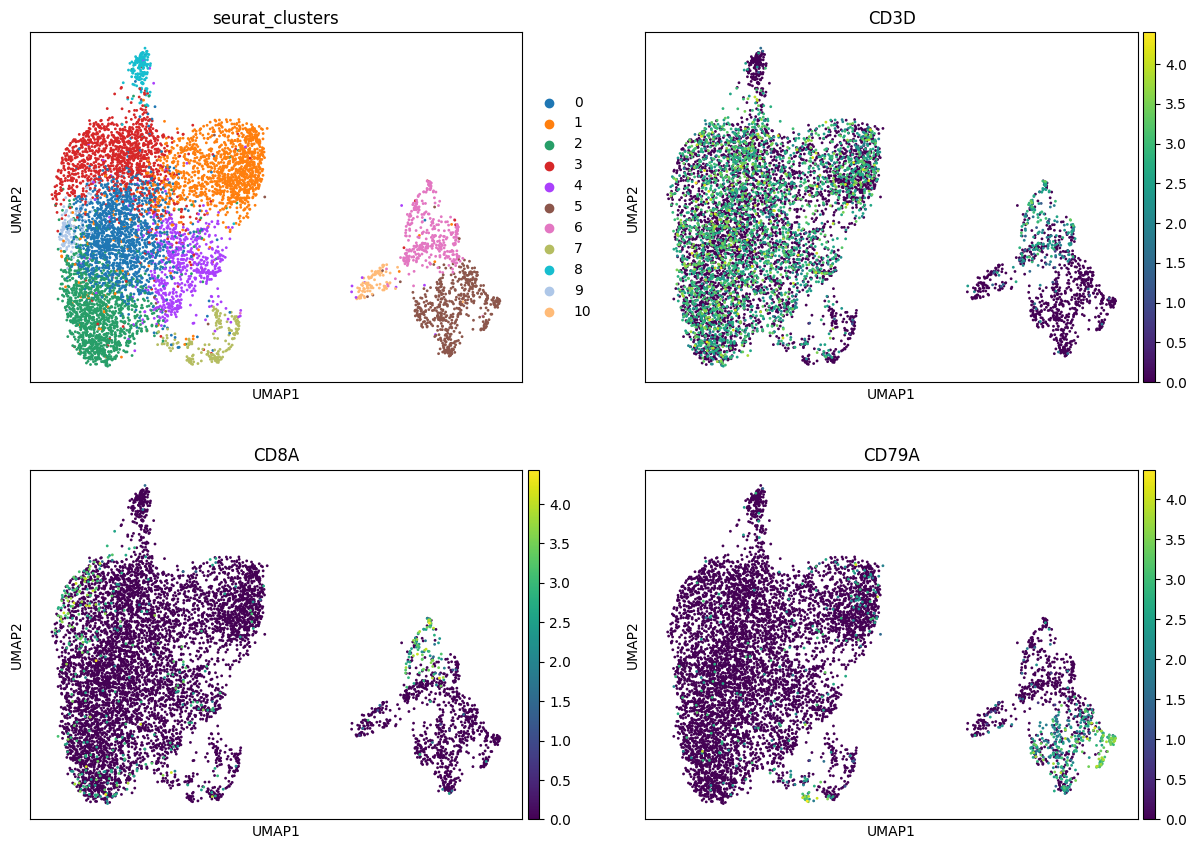

In [8]:
sc.pl.umap(T_ad,color=['seurat_clusters','CD3D','CD8A','CD79A'],ncols=2)

In [4]:
sc.pp.neighbors(T_ad)
# sc.tl.leiden(T_ad)

g:\C_pan_copy_dir\.conda\envs\torch_gpu_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [32]:
predictions = celltypist.annotate(T_ad, model = 'Cells_Intestinal_Tract.pkl',majority_voting=True,over_clustering='leiden')

🔬 Input data has 7347 cells and 16824 genes
🔗 Matching reference genes in the model
🧬 3383 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🗳️ Majority voting the predictions
✅ Majority voting done!


In [33]:
predictions

CellTypist prediction result for 7347 query cells
    predicted_labels: data frame with 3 columns ('predicted_labels', 'over_clustering', 'majority_voting')
    decision_matrix: data frame with 7347 query cells and 134 cell types
    probability_matrix: data frame with 7347 query cells and 134 cell types
    adata: AnnData object referred

In [34]:
T_pred_ad = predictions.to_adata()
T_pred_ad

AnnData object with n_obs × n_vars = 7347 × 16824
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'integrated_snn_res.0.6', 'seurat_clusters', 'predicted_labels', 'conf_score', 'majority_voting', 'leiden', 'over_clustering'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'seurat_clusters_colors', 'predicted_labels_colors', 'neighbors', 'over_clustering', 'majority_voting_colors', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

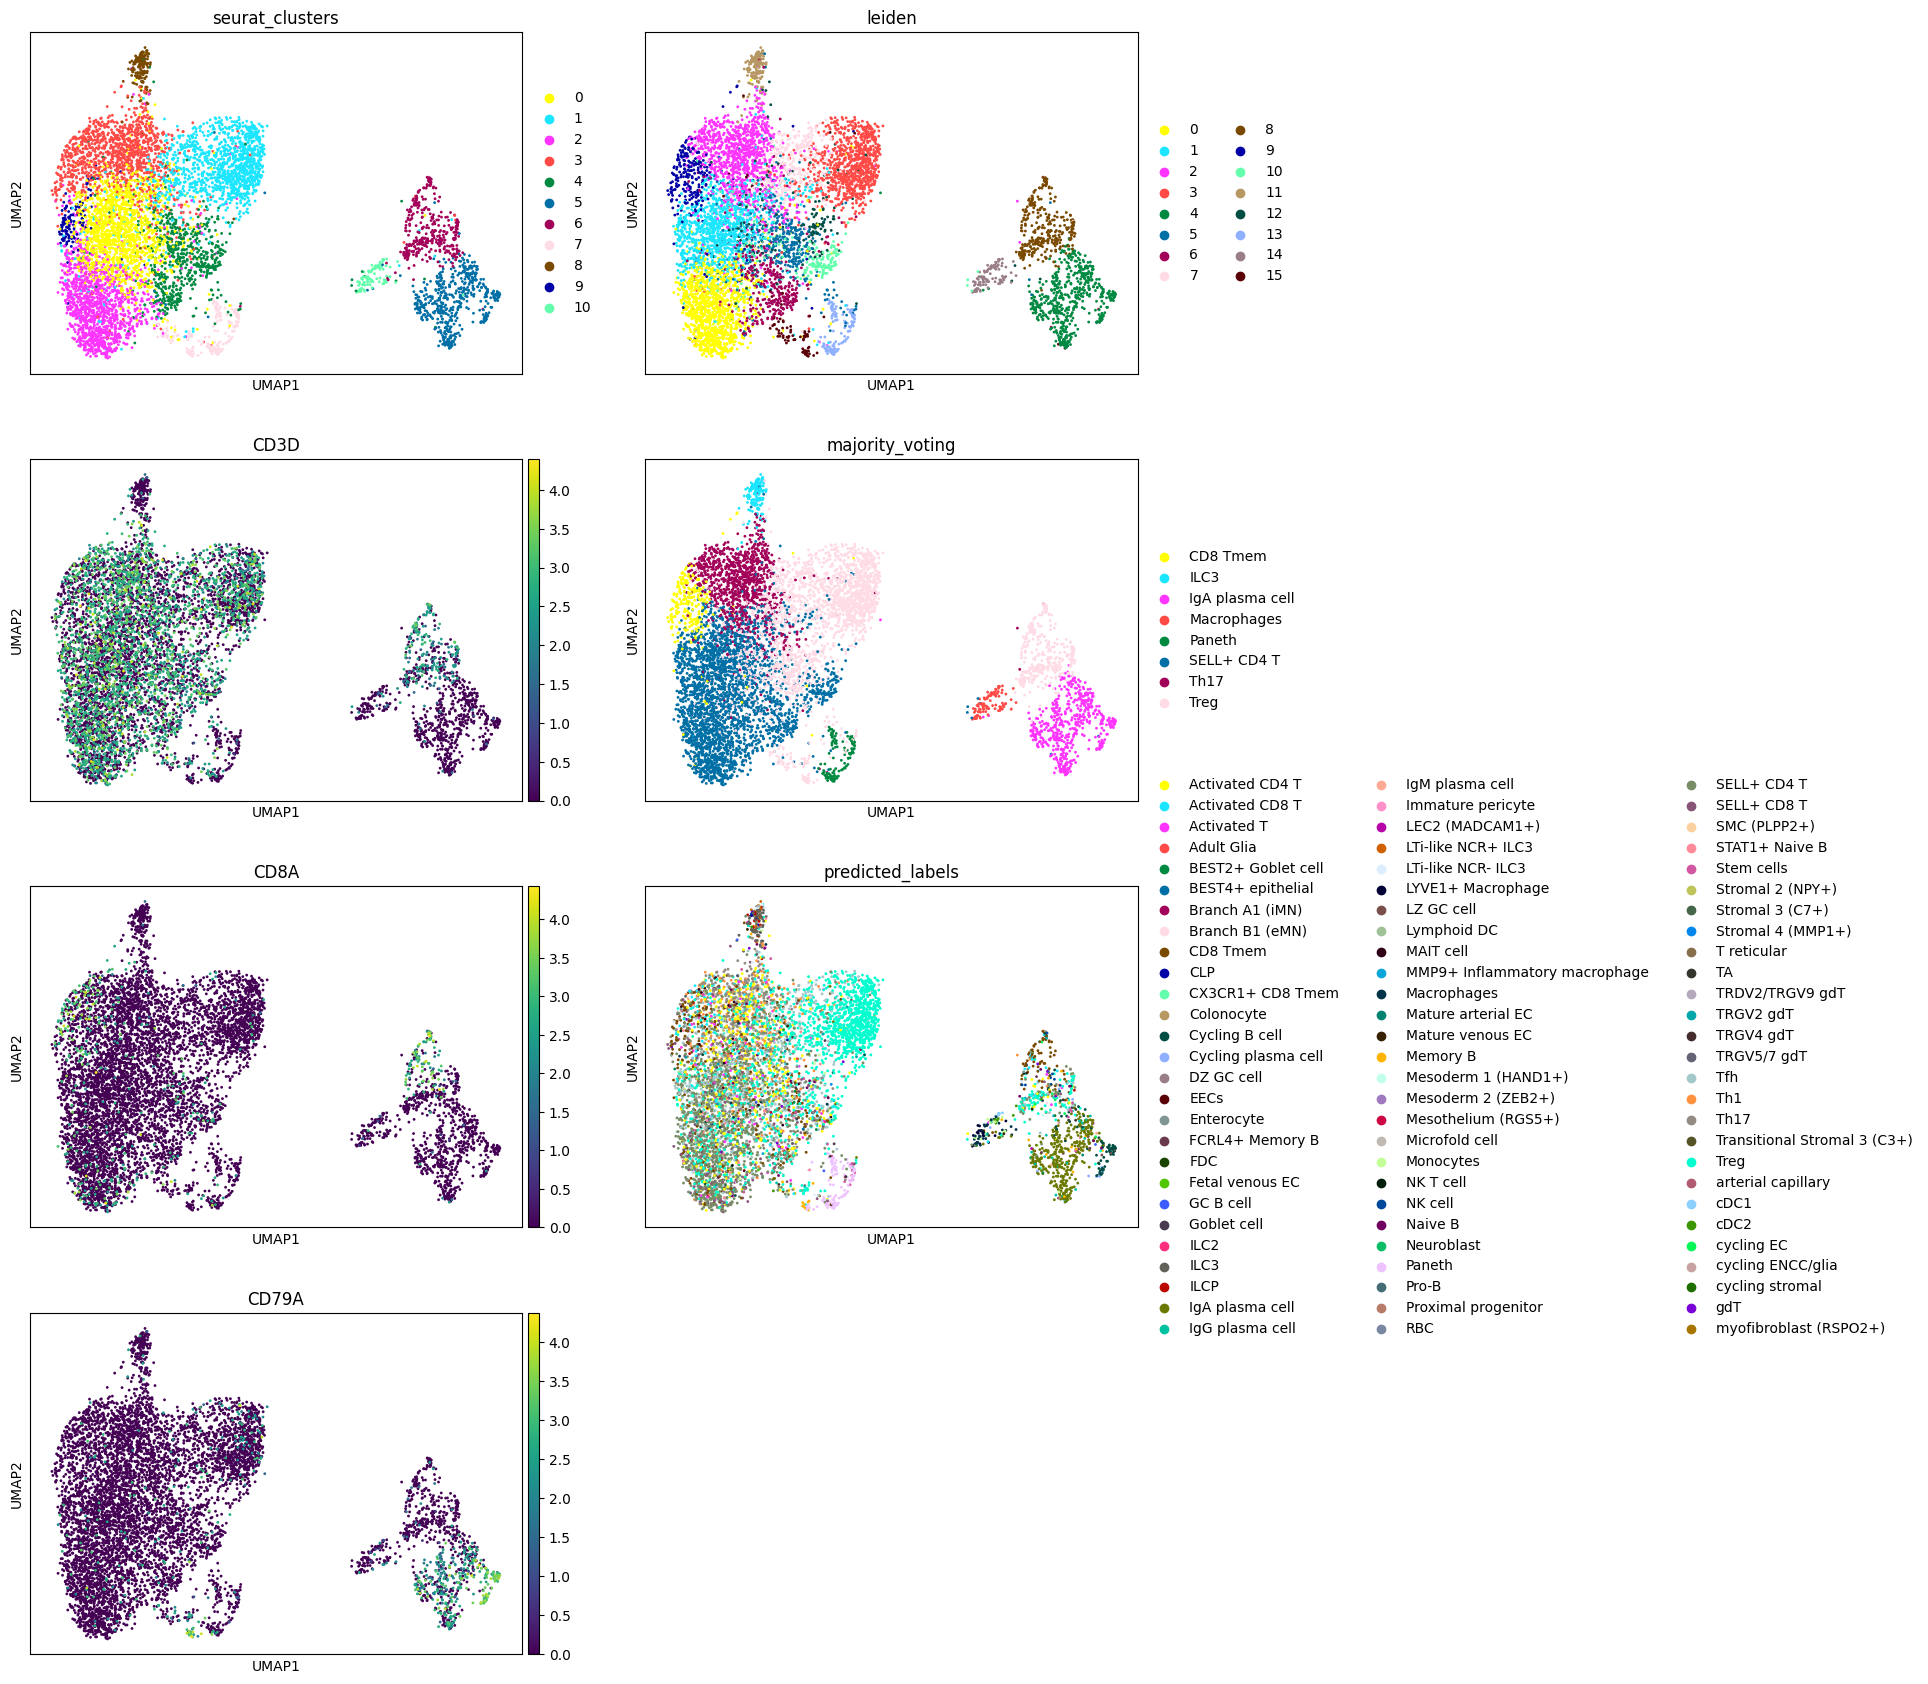

In [39]:
sc.pl.umap(T_pred_ad,color=['seurat_clusters','leiden','CD3D','majority_voting','CD8A','predicted_labels','CD79A'], ncols=2, palette=sc.pl.palettes.default_102)

In [5]:
predictions_heuristic = celltypist.annotate(T_ad, model = 'Cells_Intestinal_Tract.pkl',majority_voting=True,over_clustering=None)

🔬 Input data has 7347 cells and 16824 genes
🔗 Matching reference genes in the model
🧬 3383 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


In [7]:
T_heuristic_pred_ad = predictions_heuristic.to_adata()
T_heuristic_pred_ad

AnnData object with n_obs × n_vars = 7347 × 16824
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'integrated_snn_res.0.6', 'seurat_clusters', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'neighbors', 'over_clustering'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

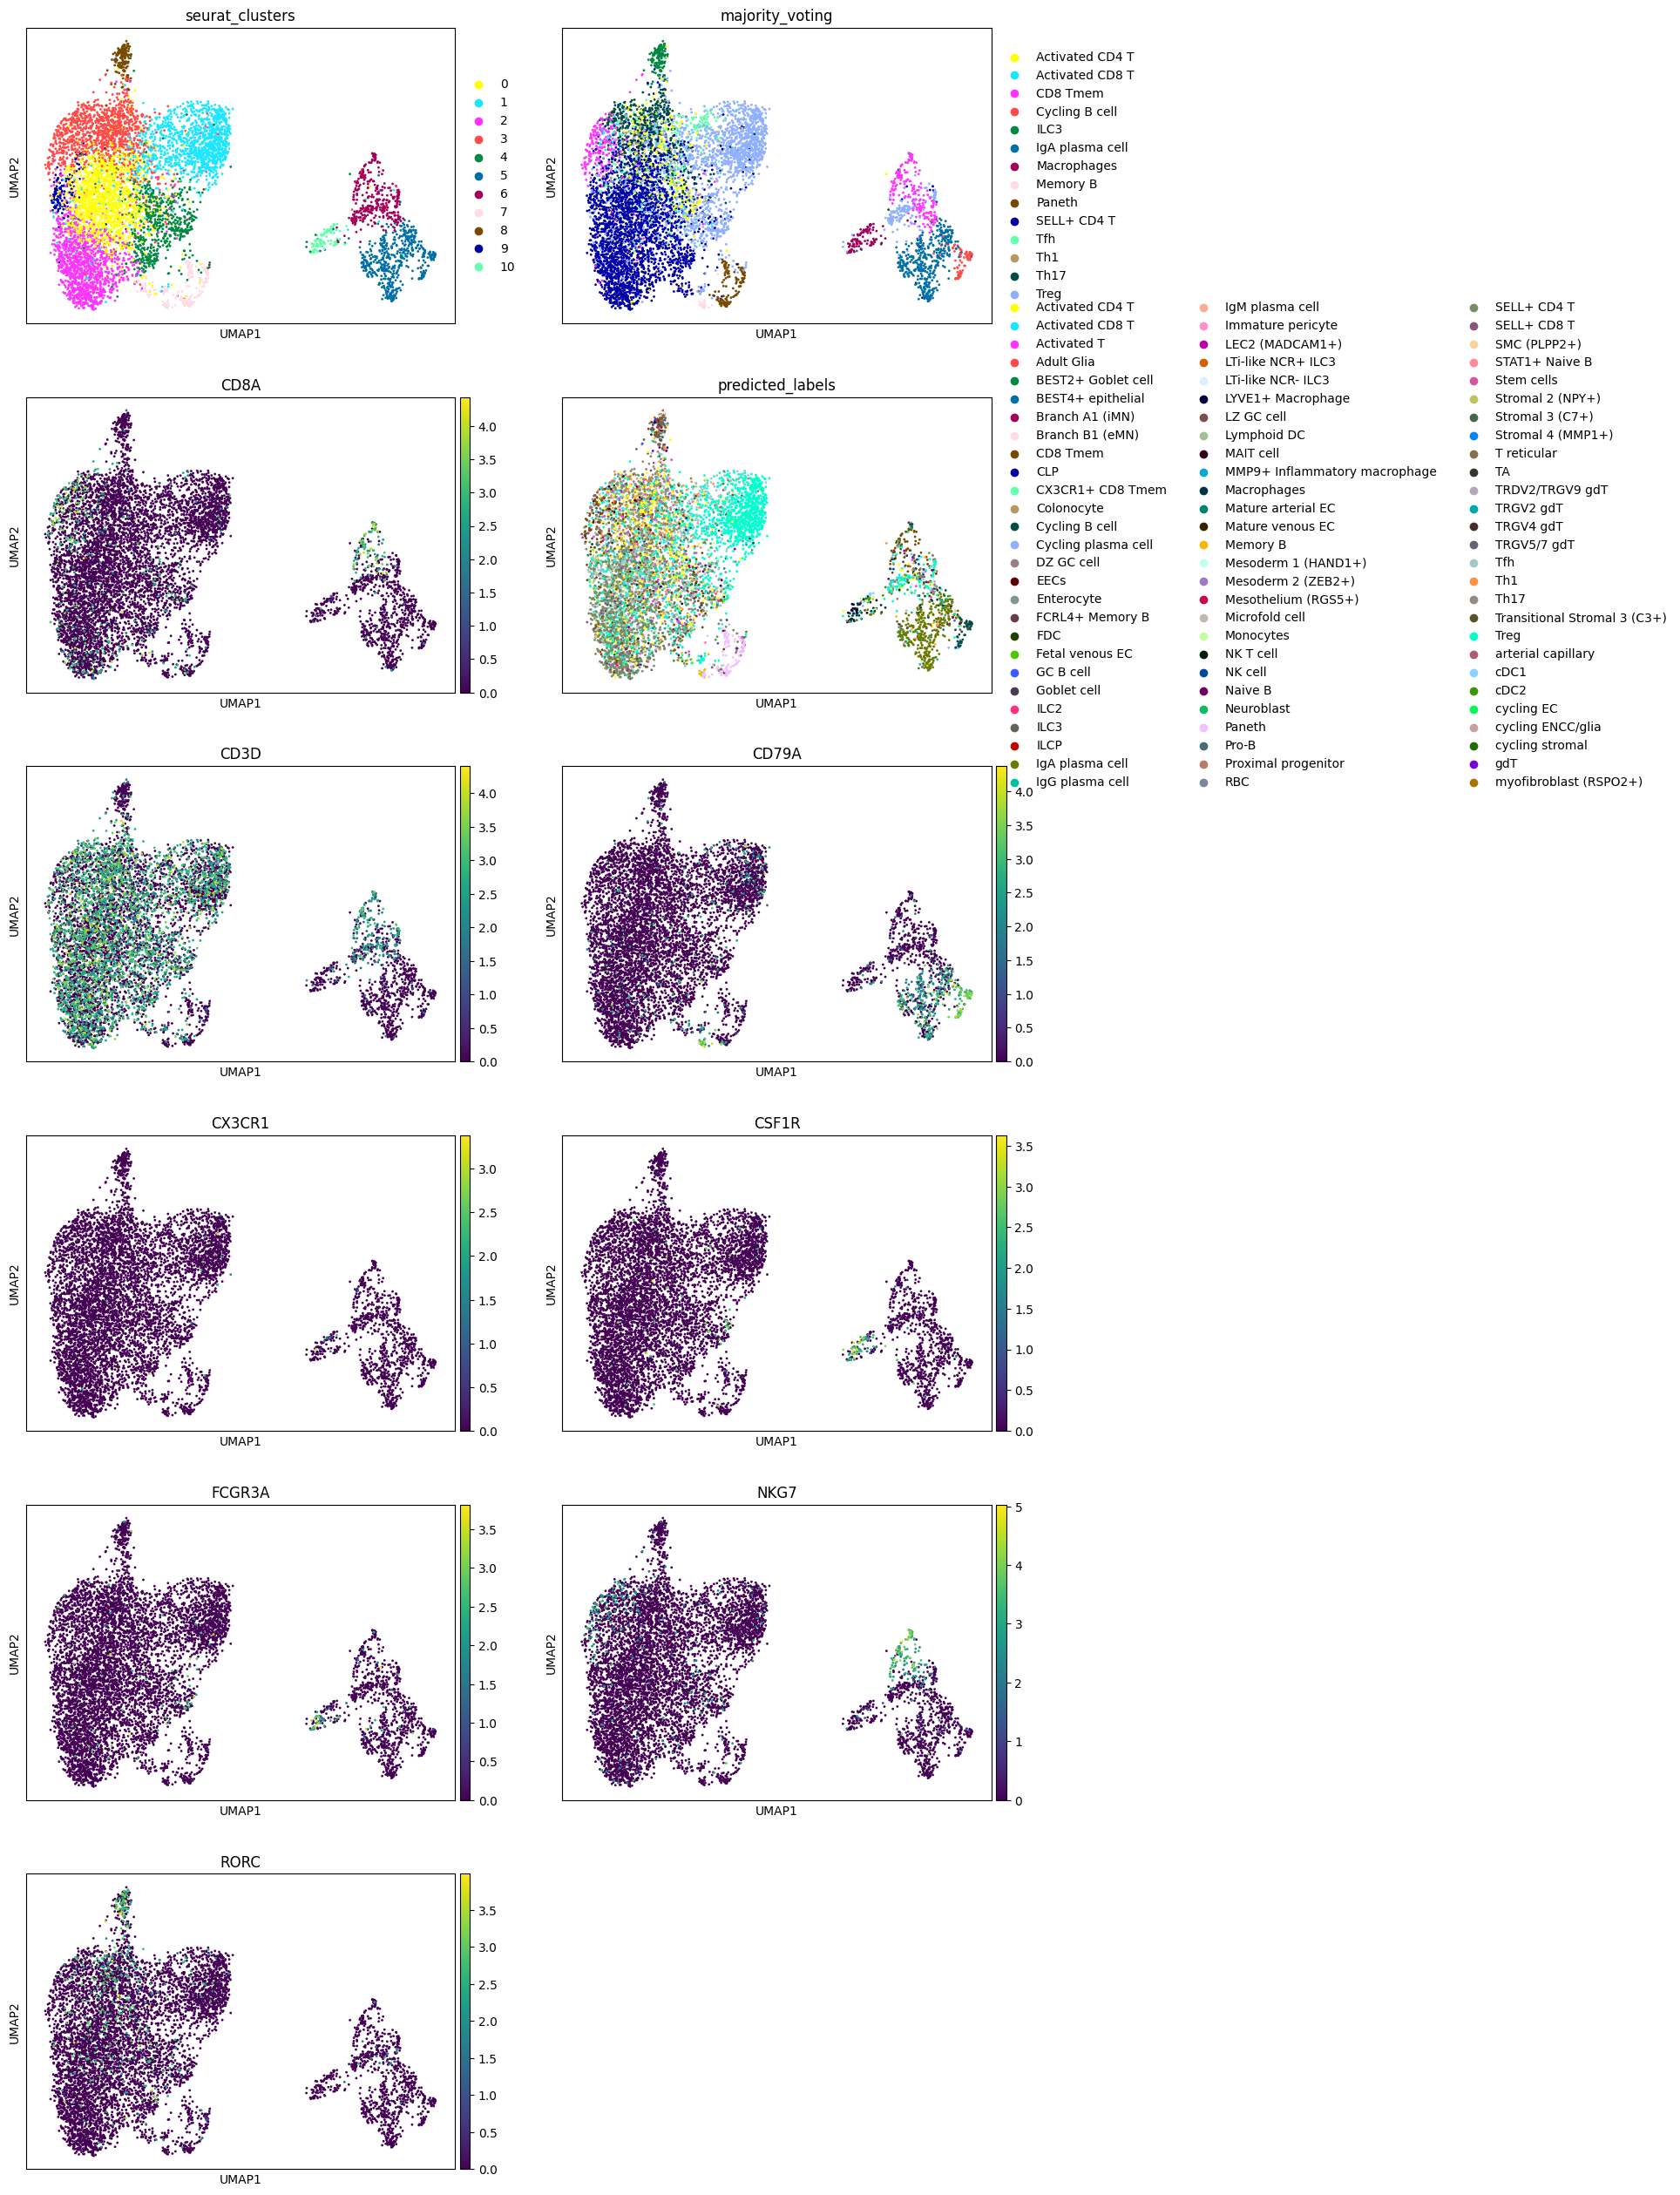

In [17]:
sc.pl.umap(T_heuristic_pred_ad,color=['seurat_clusters','majority_voting','CD8A','predicted_labels','CD3D','CD79A','CX3CR1','CSF1R','FCGR3A','NKG7','RORC'], ncols=2, palette=sc.pl.palettes.default_102)

In [18]:
T_heuristic_pred_ad.obs.head()

orig.ident  nCount_RNA  nFeature_RNA     stim  \
AAACAAGCAATGGATTACAGTCTG-1    TLS_P_1       587.0           515  TLS_P_1   
AAACCAGGTCAGGAACACAGTCTG-1    TLS_P_1       718.0           621  TLS_P_1   
AAACGGGCAAGGAATAACAGTCTG-1    TLS_P_1       626.0           549  TLS_P_1   
AAACGTTCAACCATTCACAGTCTG-1    TLS_P_1       525.0           466  TLS_P_1   
AAACGTTCAACCGGATACAGTCTG-1    TLS_P_1       819.0           693  TLS_P_1   

                           integrated_snn_res.0.6 seurat_clusters  \
AAACAAGCAATGGATTACAGTCTG-1                      1               1   
AAACCAGGTCAGGAACACAGTCTG-1                      3               3   
AAACGGGCAAGGAATAACAGTCTG-1                      1               1   
AAACGTTCAACCATTCACAGTCTG-1                      0               0   
AAACGTTCAACCGGATACAGTCTG-1                      0               0   

                           predicted_labels over_clustering majority_voting  \
AAACAAGCAATGGATTACAGTCTG-1             Treg              27            Treg   
AAACCAGGTCAGGAACACAGTCTG-1   Cycling B cell             102        CD8 Tmem   
AAACGGGCAAGGAATAACAGTCTG-1             Treg              27            Treg   
AAACGTTCAACCATTCACAGTCTG-1      SELL+ CD4 T              75     SELL+ CD4 T   
AAACGTTCAACCGGATACAGTCTG-1      SELL+ CD4 T              61     SELL+ CD4 T   

                            conf_score  
AAACAAGCAATGGATTACAGTCTG-1    0.999997  
AAACCAGGTCAGGAACACAGTCTG-1    0.964203  
AAACGGGCAAGGAATAACAGTCTG-1    0.974704  
AAACGTTCAACCATTCACAGTCTG-1    0.964568  
AAACGTTCAACCGGATACAGTCTG-1    0.888626

In [22]:
T_heuristic_pred_ad.obs.loc[
    (T_heuristic_pred_ad.obs['majority_voting'] == 'CD8 Tmem') & 
    (T_heuristic_pred_ad.obs['seurat_clusters'] == '3'),
    'CD8T_compare'
] = "Left_CD8+T"
T_heuristic_pred_ad.obs.loc[
    (T_heuristic_pred_ad.obs['majority_voting'] == 'CD8 Tmem') & 
    (T_heuristic_pred_ad.obs['seurat_clusters'] == '6'),
    'CD8T_compare'
] = "Right_CD8+T"
T_heuristic_pred_ad.obs.head()

orig.ident  nCount_RNA  nFeature_RNA     stim  \
AAACAAGCAATGGATTACAGTCTG-1    TLS_P_1       587.0           515  TLS_P_1   
AAACCAGGTCAGGAACACAGTCTG-1    TLS_P_1       718.0           621  TLS_P_1   
AAACGGGCAAGGAATAACAGTCTG-1    TLS_P_1       626.0           549  TLS_P_1   
AAACGTTCAACCATTCACAGTCTG-1    TLS_P_1       525.0           466  TLS_P_1   
AAACGTTCAACCGGATACAGTCTG-1    TLS_P_1       819.0           693  TLS_P_1   

                           integrated_snn_res.0.6 seurat_clusters  \
AAACAAGCAATGGATTACAGTCTG-1                      1               1   
AAACCAGGTCAGGAACACAGTCTG-1                      3               3   
AAACGGGCAAGGAATAACAGTCTG-1                      1               1   
AAACGTTCAACCATTCACAGTCTG-1                      0               0   
AAACGTTCAACCGGATACAGTCTG-1                      0               0   

                           predicted_labels over_clustering majority_voting  \
AAACAAGCAATGGATTACAGTCTG-1             Treg              27            Treg   
AAACCAGGTCAGGAACACAGTCTG-1   Cycling B cell             102        CD8 Tmem   
AAACGGGCAAGGAATAACAGTCTG-1             Treg              27            Treg   
AAACGTTCAACCATTCACAGTCTG-1      SELL+ CD4 T              75     SELL+ CD4 T   
AAACGTTCAACCGGATACAGTCTG-1      SELL+ CD4 T              61     SELL+ CD4 T   

                            conf_score CD8T_compare  
AAACAAGCAATGGATTACAGTCTG-1    0.999997          NaN  
AAACCAGGTCAGGAACACAGTCTG-1    0.964203   Left_CD8+T  
AAACGGGCAAGGAATAACAGTCTG-1    0.974704          NaN  
AAACGTTCAACCATTCACAGTCTG-1    0.964568          NaN  
AAACGTTCAACCGGATACAGTCTG-1    0.888626          NaN

In [24]:
sc.tl.rank_genes_groups(
    T_heuristic_pred_ad,
    groupby='CD8T_compare',
    reference='Left_CD8+T',
    groups=['Right_CD8+T'],
    method='wilcoxon'  # 或 't-test'
)

In [27]:
sc.get.rank_genes_groups_df(T_heuristic_pred_ad,group=None)[:20]

names     scores  logfoldchanges         pvals     pvals_adj
0   HIST1H1B  12.726327        6.853680  4.222407e-37  7.103777e-33
1   HIST1H1C  11.952868        4.205129  6.272306e-33  5.276264e-29
2   HIST1H1D  11.430840        4.712922  2.932552e-30  1.233431e-26
3      HMGB2  10.923769        4.415671  8.873509e-28  2.985758e-24
4      MKI67  10.861612       31.812487  1.756210e-27  4.924412e-24
5      CENPM  10.495213        5.840167  9.087338e-26  2.184077e-22
6       TYMS  10.262940       31.672405  1.035058e-24  2.176727e-21
7      HELLS   9.355352        4.603095  8.332123e-21  1.557552e-17
8   HIST1H1E   9.137102        3.593776  6.414846e-20  1.079234e-16
9      LMNB1   8.912308        3.829468  4.998117e-19  7.644393e-16
10      RRM2   8.868844        7.424439  7.390882e-19  1.036202e-15
11    NCAPG2   8.685644        5.816869  3.766012e-18  4.873798e-15
12     H2AFX   8.393085        5.697449  4.735482e-17  5.311316e-14
13     TOP2A   8.332330        6.289614  7.926657e-17  8.334880e-14
14     FANCI   8.160346        5.069438  3.340652e-16  3.306066e-13
15     COTL1   8.081832        2.780824  6.380091e-16  5.963259e-13
16    ANP32E   8.070616        3.221605  6.994451e-16  6.193403e-13
17     ASF1B   8.039304       30.677292  9.035054e-16  6.988848e-13
18     KIFC1   8.039304       30.739079  9.035054e-16  6.988848e-13
19      EZH2   8.037902        4.293316  9.139007e-16  6.988848e-13

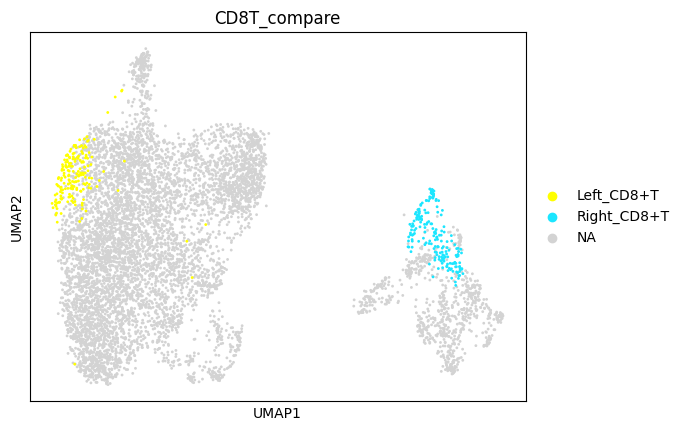

In [29]:
sc.pl.umap(T_heuristic_pred_ad,color=['CD8T_compare'],groups=['Left_CD8+T','Right_CD8+T'], ncols=2, palette=sc.pl.palettes.default_102)

In [31]:
sc.tl.rank_genes_groups(
    T_heuristic_pred_ad,
    groupby='seurat_clusters',
    reference='rest',
    groups=['5','6','10'],
    method='wilcoxon'  # 或 't-test'
)

In [32]:
sc.get.rank_genes_groups_df(T_heuristic_pred_ad,group=None)[:20]

group     names     scores  logfoldchanges          pvals      pvals_adj
0      5      MZB1  32.087513        7.785784  6.584409e-226  1.107761e-221
1      5   POU2AF1  31.187544        6.576859  1.571996e-213  1.322363e-209
2      5    TXNDC5  30.406904        5.706219  4.451746e-203  2.496539e-199
3      5  HIST1H1B  29.478111        5.547602  5.493838e-191  2.310708e-187
4      5  HIST1H1C  28.301462        3.930730  3.315672e-176  1.115657e-172
5      5      XBP1  28.172735        5.428369  1.262269e-174  3.539402e-171
6      5     MYBL2  26.352449        6.047432  4.811038e-153  1.011761e-149
7      5      BTG2  24.869129        4.149514  1.606043e-136  3.002229e-133
8      5  HIST1H1E  23.710001        3.605814  2.843430e-124  3.986489e-121
9      5    CRELD2  23.677881        4.073135  6.094728e-124  7.887516e-121
10     5      ELL2  23.225842        5.421043  2.496421e-119  2.999985e-116
11     5    SEC11C  23.092615        3.941599  5.492850e-118  6.160780e-115
12     5  HIST1H1D  22.691124        3.329100  5.481913e-114  5.764231e-111
13     5      TCF3  22.685921        3.814564  6.170155e-114  6.106276e-111
14     5     CD79A  21.942883        5.299844  1.012760e-106  9.465932e-104
15     5     ITM2C  21.860256        3.571653  6.209480e-106  5.498331e-103
16     5     DERL3  20.908642        6.204411   4.467753e-97   3.579309e-94
17     5   TXNDC11  20.740654        3.524611   1.488851e-95   1.138565e-92
18     5    TENT5C  20.709599        4.259440   2.838138e-95   2.076037e-92
19     5      CD38  20.588127        3.893866   3.506616e-94   2.458138e-91

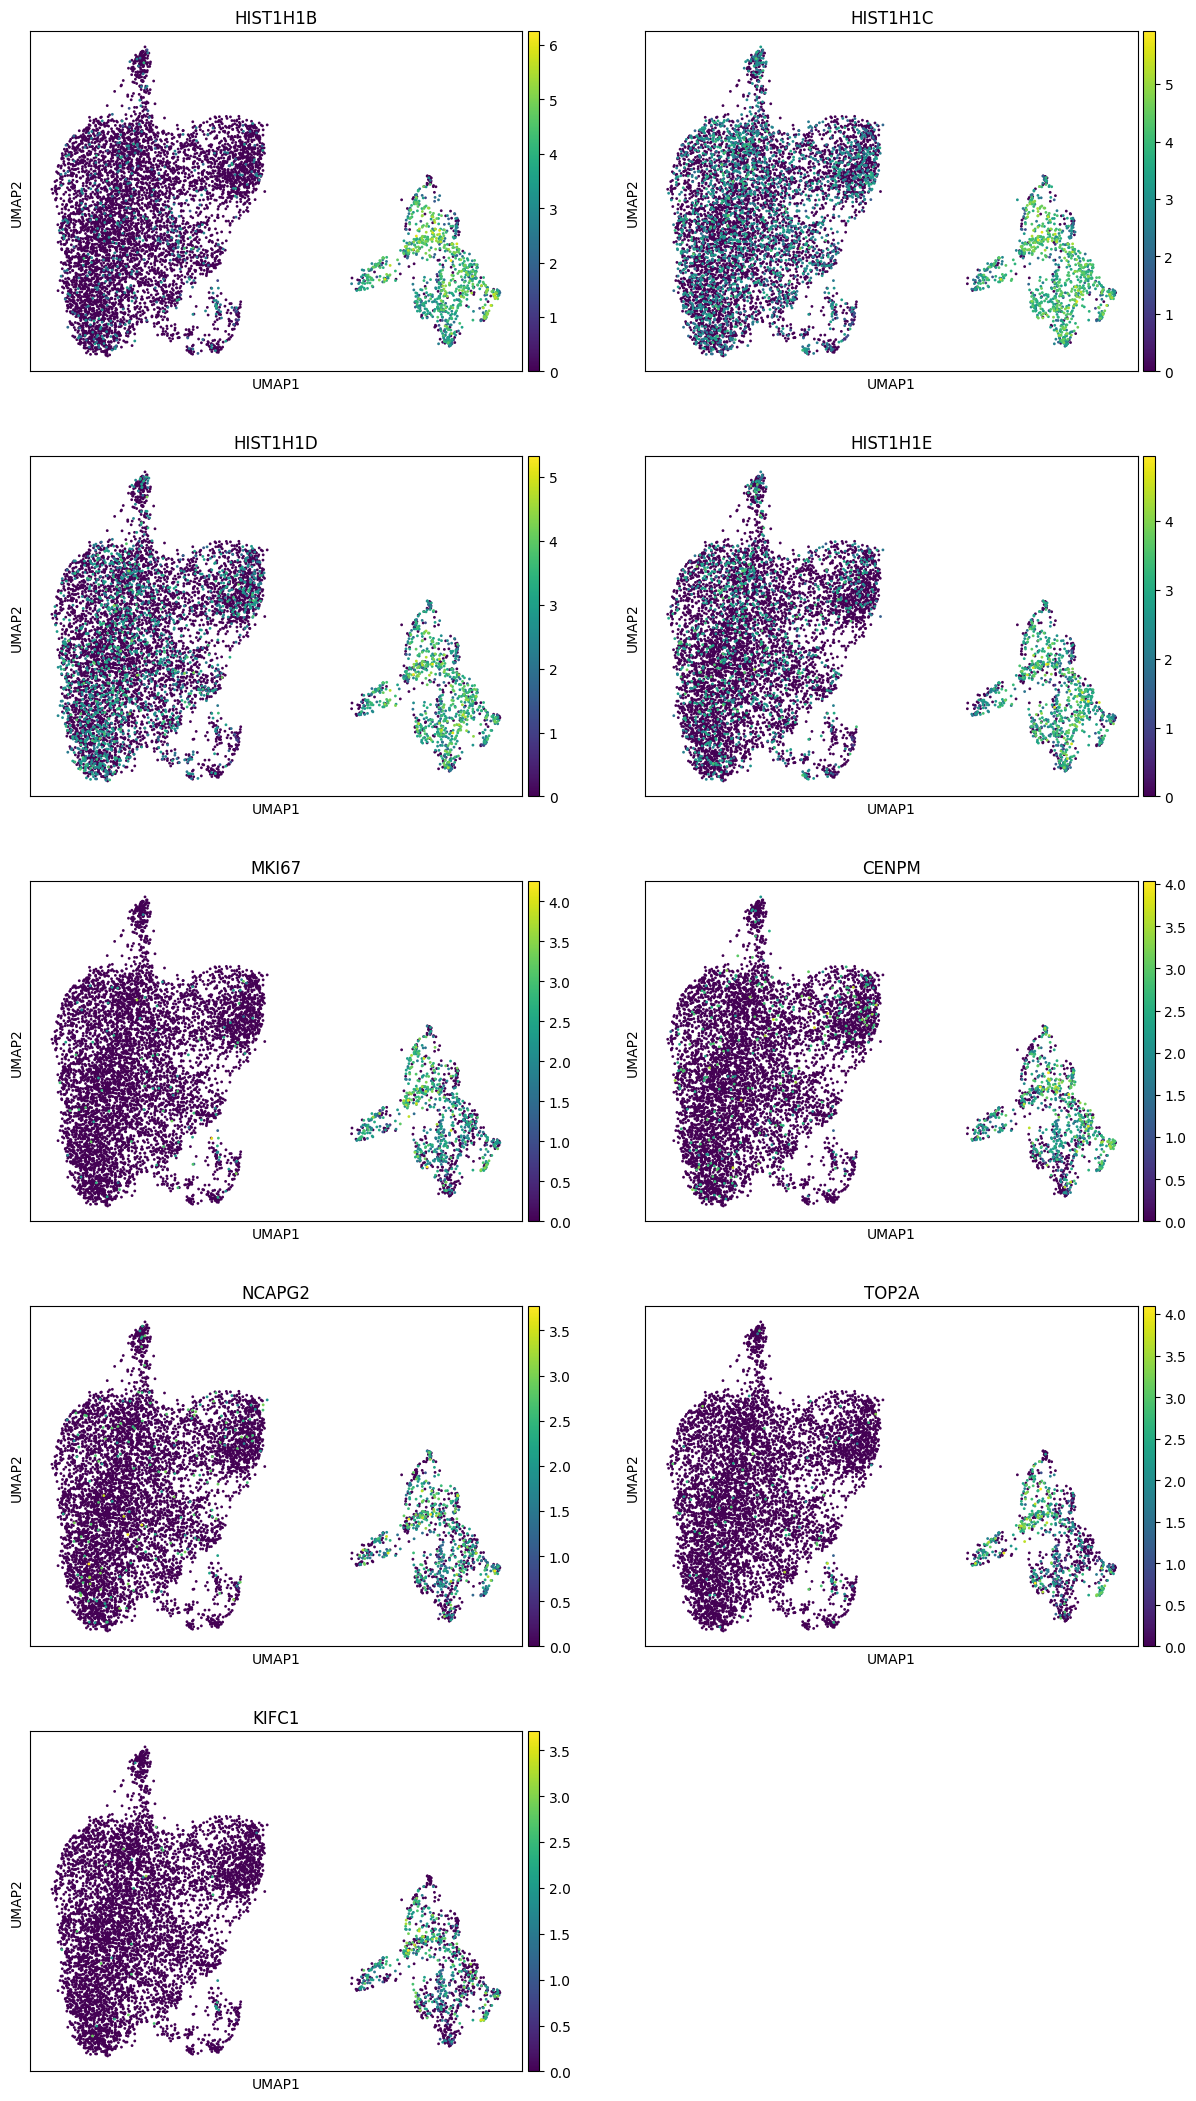

In [36]:
sc.pl.umap(T_heuristic_pred_ad, color=['HIST1H1B','HIST1H1C','HIST1H1D', 'HIST1H1E',
                                       'MKI67','CENPM','NCAPG2','TOP2A','KIFC1',
                                       ], ncols=2, palette=sc.pl.palettes.default_102)